In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pyeit.mesh as mesh
import os
from matplotlib.patches import Circle
from src.util import createTrajectory
from matplotlib import cm
from matplotlib.colors import Normalize

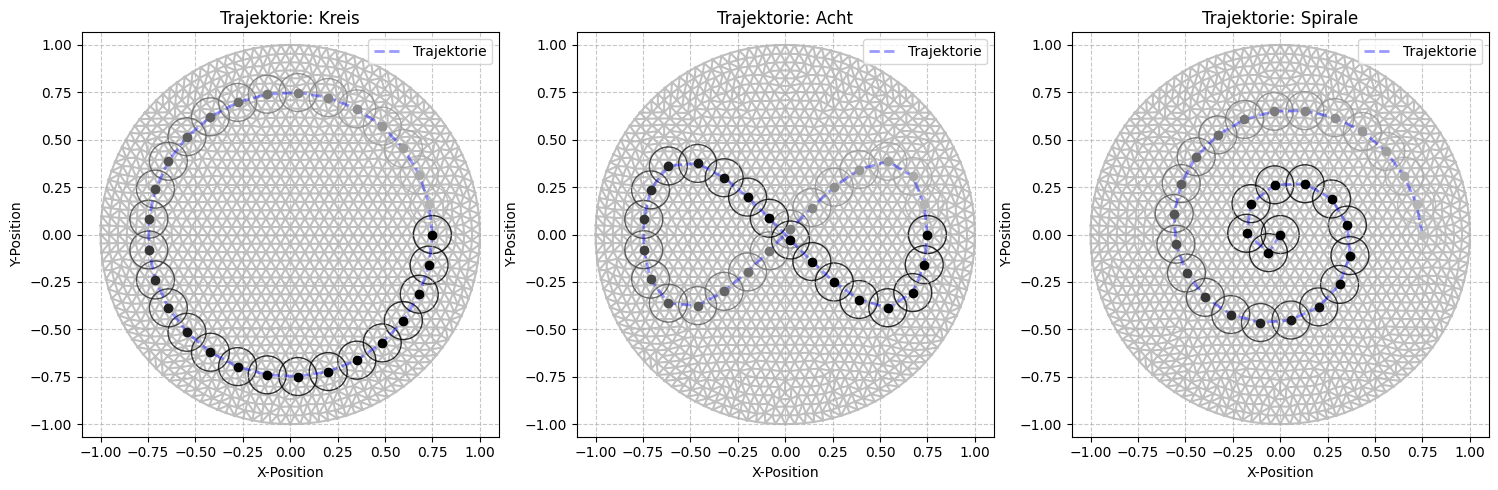

In [2]:
def get_pos_of_anomaly(traj, Nsteps, r, r_path, r_path_variations, bound):
    center_pos = createTrajectory(traj, r_path, r_path_variations, bound, num_points=Nsteps)
    return center_pos

def get_figure_plot(center_pos, Nsteps, ax):
    n_el = 16
    mesh_obj = mesh.create(n_el, h0=0.05)  # Erstellen des Meshes

    pts = mesh_obj.node
    tri = mesh_obj.element

    ax.triplot(pts[:, 0], pts[:, 1], tri, color='gray', alpha=0.5)

    x_coords = center_pos[:, 0]
    y_coords = center_pos[:, 1]
    
    cmap = cm.Greys
    norm = Normalize(vmin=0.0, vmax=0.8)  # Startet bei mittlerem Grauton und endet bei Schwarz
    colors = cmap(norm(np.linspace(0.3, 1.0, len(x_coords))))

    ax.plot(x_coords, y_coords, '--', color='blue', alpha=0.4, label='Trajektorie', linewidth=2)
    #ax.plot(x_coords, y_coords, 'o', color='red', markersize =6)

    Npos = Nsteps
    indices = np.linspace(0, len(x_coords)-1, Npos,dtype=int)
    for i in indices:
        ax.plot(x_coords[i], y_coords[i], 'o', color=colors[i], markersize=6)

        circle = Circle((x_coords[i], y_coords[i]), radius=0.1, fill=False, color=colors[i], alpha=0.8)
        ax.add_patch(circle)

    ax.axis('equal')
    ax.set_xlabel('X-Position')
    ax.set_ylabel('Y-Position')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend()

def create_figure(trajectories, Nsteps, r, r_path, r_path_variations, bound, filename):
    fig, axes = plt.subplots(1, len(trajectories), figsize=(15, 5))

    for i, traj in enumerate(trajectories):
        center_pos = get_pos_of_anomaly(traj, Nsteps, r, r_path, r_path_variations, bound)
        ax = axes[i]
        get_figure_plot(center_pos, Nsteps, ax)
        ax.set_title(f'Trajektorie: {traj}')

    plt.tight_layout()
    plt.savefig(filename, format='pdf') 
    plt.show()

# Beispielaufruf der Funktion
trajectories = ["Kreis", "Acht", "Spirale"]
Nsteps = 30
r = 0.2
r_path = 0.75
r_path_variations = False
bound = 0.1

create_figure(trajectories, Nsteps, r, r_path, r_path_variations, bound, filename='trajectory_plot.pdf')